In [3]:
import networkx as nx
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
import igraph as ig
from collections import Counter

In [4]:
def gnp_random_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erd?s-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = itertools.combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in itertools.groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [5]:
n=200
p= 0.025
G = gnp_random_graph(n, p)
nx.nodes(G)
nx.edges(G)

EdgeView([(0, 14), (0, 61), (0, 75), (0, 96), (0, 174), (1, 30), (1, 44), (1, 128), (1, 130), (2, 11), (2, 87), (2, 96), (2, 142), (2, 161), (3, 22), (3, 76), (4, 6), (4, 29), (4, 116), (4, 136), (4, 172), (4, 175), (4, 179), (4, 193), (4, 196), (5, 54), (5, 62), (6, 19), (6, 56), (7, 12), (7, 138), (7, 151), (8, 40), (8, 54), (8, 62), (8, 64), (8, 103), (9, 48), (9, 140), (9, 152), (9, 171), (9, 175), (10, 21), (10, 44), (10, 60), (10, 107), (10, 159), (10, 184), (10, 185), (11, 16), (11, 18), (11, 69), (11, 86), (11, 137), (11, 138), (12, 58), (12, 103), (12, 147), (12, 158), (13, 119), (13, 132), (13, 159), (13, 174), (13, 189), (14, 62), (14, 123), (14, 125), (14, 175), (15, 50), (15, 55), (15, 94), (15, 189), (16, 62), (16, 125), (17, 66), (17, 101), (17, 177), (18, 53), (18, 56), (18, 59), (18, 65), (18, 92), (18, 175), (18, 185), (19, 29), (19, 105), (19, 177), (20, 113), (21, 24), (21, 93), (21, 98), (21, 120), (22, 51), (22, 97), (22, 138), (23, 36), (23, 120), (23, 145), (23,

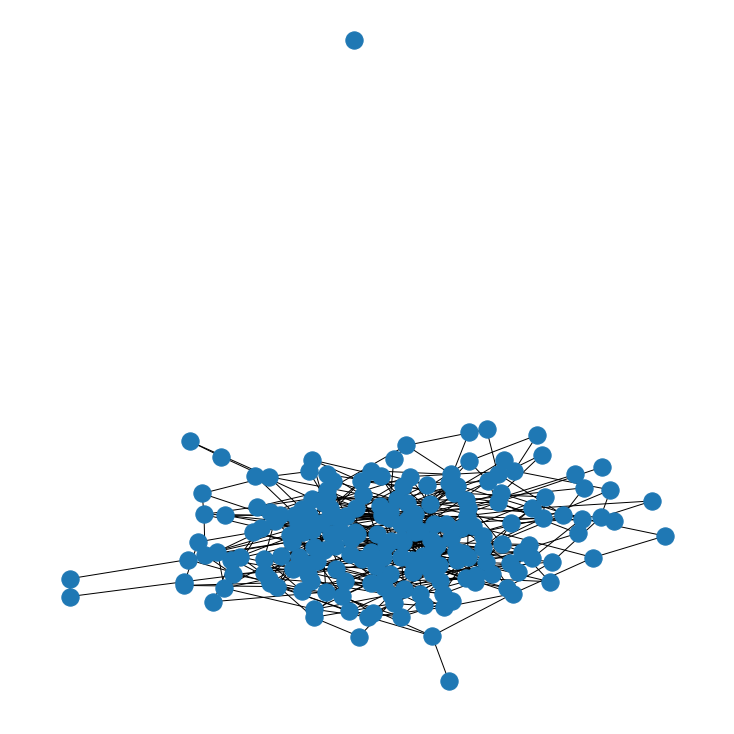

In [6]:
plt.figure(figsize=(10,10))
nx.draw(G)

In [7]:
Gedgelist = nx.edges(G)
Gnodelist = nx.nodes(G)
Bzero = nx.number_connected_components(G)
Gedgenum = len(Gedgelist)
Gnodenum = len(Gnodelist)
XG = Gnodenum - Gedgenum

In [8]:
def d(p,q):
    ""
    return np.sqrt(sum([p[i]-q[i]])**2 for i in range(len(p))) 

def distances(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)]for i in range(nps)])

def is_simplex(g, vs):
    ""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

def simplices(g,k):
    ""
    ss = []
    for i in g.keys():
        vvs = [j for j in g[i] if j>1]
        for subset in itertools.combinations(vvs, k):
            if is_simplex(g, subset):
                ss.append((i,) + subset)
    return ss


In [9]:
def question1func(nodes, verse):
    ""
    plt.figure(figsize=(10,10))
    n = nodes
    pxs = np.linspace(0,1, 100)
    pxs = [ round(elem, 3) for elem in pxs ]
    yxs=[]
    if verse == "Bzero":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            yxs.append(Bzero)
        
        
    elif verse == "XG":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            XG = Gnodenum - Gedgenum
            yxs.append(XG)
        
    elif verse == "Bone":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            yxs.append(Bone)
    
    elif verse == "Virus":
        for i in pxs:
            G = gnp_random_graph(n, i)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            if Bzero != 1:
                yxs.append(0)
            elif Bzero == 1:
                yxs.append(1)
            for i in yxs:
                if i == 1:
                    first = list.index(i)
                break
            
    
    return plt.plot(pxs,yxs)

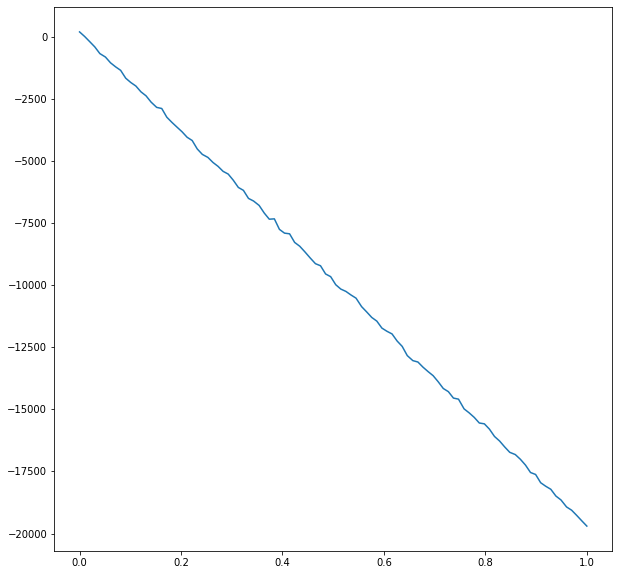

In [10]:
question1func(200, "XG")

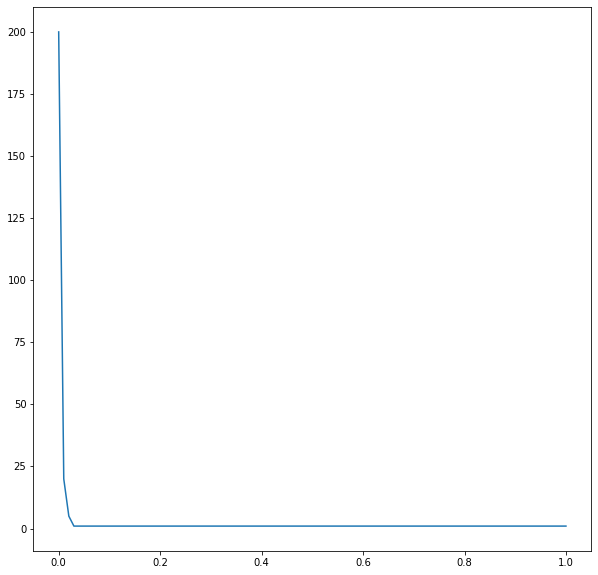

In [11]:
question1func(200, "Bzero")

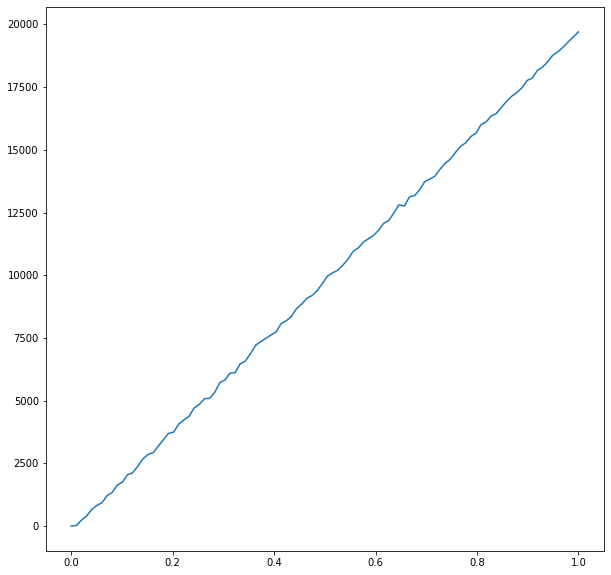

In [12]:
question1func(200, "Bone")

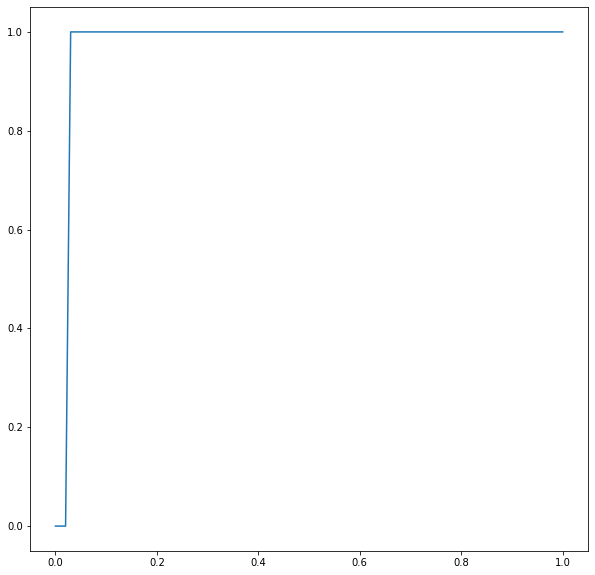

In [13]:
question1func(200, "Virus")

In [14]:
def whenfullinfected(nodes, number, start, stop, gaps):
    list = []
    n = nodes
    pxs = np.linspace(start,stop,gaps)
    pxs = [ round(elem, 3) for elem in pxs ]
    yxs=[]
    for j in range(number):
        for a in pxs:
            G = gnp_random_graph(n, a)
            Gedgelist = nx.edges(G)
            Gnodelist = nx.nodes(G)
            Gedgenum = len(Gedgelist)
            Gnodenum = len(Gnodelist)
            Bzero = nx.number_connected_components(G)
            XG = Gnodenum - Gedgenum
            Bone = Bzero - XG
            if Bzero == 1: 
                yxs.append(1)
                list.append(a)
                break
    return list

In [15]:
def calcer(nodes, number, start, stop, gaps):
    list = whenfullinfected(nodes, number, start, stop, gaps)
    fullcount = Counter(list)
    return fullcount

In [16]:
#calcer(200, 500, 0, 0.1, 25)

In [17]:
def firstonlycalcer(nodes, number, start, stop, gaps):
    list = whenfullinfected(nodes, number, start, stop, gaps)
    fullcount = Counter(list)
    #print(fullcount)
    return min(fullcount.keys())

In [18]:
#firstonlycalcer(200,100,0,0.1,25)

In [19]:
def nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps):
    n = np.linspace(nstart,nstop, nstep, dtype=int)
    when = {}
    fullyat = []
    h = -1
    for i in n:
        z = firstonlycalcer(int(i), number,start, stop, gaps)
        fullyat.append(z)
    for a in n:
        h += 1
        when[a] = fullyat[h]
            
    keys = when.keys()
    values = when.values()
    return when

In [20]:
#nchangecalcer(1,500,50,50,0,0.5,100)

In [21]:
def finalq1check(nstart,nstop,nstep,number, start, stop, gaps):
    ""
    a = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)
    b = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)
    c = nchangecalcer(nstart,nstop,nstep,number, start, stop, gaps)

    sums= Counter()
    counters = Counter()
    for itemset in [a,b,c]:
        sums.update(itemset)
        counters.update(itemset.keys())
    
    ret = {x: float(sums[x])/counters[x] for x in sums.keys()}
    keys = ret.keys()
    values = ret.values()
    plt.plot(keys,values)

In [22]:
#finalq1check(1,500,50,100,0,0.5,100)

### Question 2 Starts HERE ###

In [23]:
points_ex = [(i,i,i,i) for i in range(101)]
points_ex.pop(0)
print(points_ex)

[(1, 1, 1, 1), (2, 2, 2, 2), (3, 3, 3, 3), (4, 4, 4, 4), (5, 5, 5, 5), (6, 6, 6, 6), (7, 7, 7, 7), (8, 8, 8, 8), (9, 9, 9, 9), (10, 10, 10, 10), (11, 11, 11, 11), (12, 12, 12, 12), (13, 13, 13, 13), (14, 14, 14, 14), (15, 15, 15, 15), (16, 16, 16, 16), (17, 17, 17, 17), (18, 18, 18, 18), (19, 19, 19, 19), (20, 20, 20, 20), (21, 21, 21, 21), (22, 22, 22, 22), (23, 23, 23, 23), (24, 24, 24, 24), (25, 25, 25, 25), (26, 26, 26, 26), (27, 27, 27, 27), (28, 28, 28, 28), (29, 29, 29, 29), (30, 30, 30, 30), (31, 31, 31, 31), (32, 32, 32, 32), (33, 33, 33, 33), (34, 34, 34, 34), (35, 35, 35, 35), (36, 36, 36, 36), (37, 37, 37, 37), (38, 38, 38, 38), (39, 39, 39, 39), (40, 40, 40, 40), (41, 41, 41, 41), (42, 42, 42, 42), (43, 43, 43, 43), (44, 44, 44, 44), (45, 45, 45, 45), (46, 46, 46, 46), (47, 47, 47, 47), (48, 48, 48, 48), (49, 49, 49, 49), (50, 50, 50, 50), (51, 51, 51, 51), (52, 52, 52, 52), (53, 53, 53, 53), (54, 54, 54, 54), (55, 55, 55, 55), (56, 56, 56, 56), (57, 57, 57, 57), (58, 58, 

In [24]:
def d(p,q):
    ""
    return np.sqrt((p[0]-q[0])**2+(p[1]-q[1])**2+(p[2]-q[2])**2+(p[3]-q[3])**2)

In [25]:
d((2,1,1,2),(1,1,1,1))

1.4142135623730951

In [26]:
def distancer(ps):
    ""
    nps = len(ps)
    return np.array([[d(ps[i],ps[j]) for j in range(nps)] for i in range(nps)])

In [27]:
dists = distancer(points_ex)

In [28]:
dists

array([[  0.,   2.,   4., ..., 194., 196., 198.],
       [  2.,   0.,   2., ..., 192., 194., 196.],
       [  4.,   2.,   0., ..., 190., 192., 194.],
       ...,
       [194., 192., 190., ...,   0.,   2.,   4.],
       [196., 194., 192., ...,   2.,   0.,   2.],
       [198., 196., 194., ...,   4.,   2.,   0.]])

In [29]:
def grapher(distances, eps):
    ""
    graph = {}
    nverts = np.shape(distances)[0]
    for i in range(nverts):
        graph[i] = []
        for j in range(nverts):
            if distances[i,j] <= eps and i != j:
                graph[i].append(j)
    #g = nx.Graph(graph)
    #g.add_nodes_from(graph.keys())
    #nx.draw(g,with_labels = True)
    return graph

In [30]:
grapher(dists, 10)

{0: [1, 2, 3, 4, 5],
 1: [0, 2, 3, 4, 5, 6],
 2: [0, 1, 3, 4, 5, 6, 7],
 3: [0, 1, 2, 4, 5, 6, 7, 8],
 4: [0, 1, 2, 3, 5, 6, 7, 8, 9],
 5: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10],
 6: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11],
 7: [2, 3, 4, 5, 6, 8, 9, 10, 11, 12],
 8: [3, 4, 5, 6, 7, 9, 10, 11, 12, 13],
 9: [4, 5, 6, 7, 8, 10, 11, 12, 13, 14],
 10: [5, 6, 7, 8, 9, 11, 12, 13, 14, 15],
 11: [6, 7, 8, 9, 10, 12, 13, 14, 15, 16],
 12: [7, 8, 9, 10, 11, 13, 14, 15, 16, 17],
 13: [8, 9, 10, 11, 12, 14, 15, 16, 17, 18],
 14: [9, 10, 11, 12, 13, 15, 16, 17, 18, 19],
 15: [10, 11, 12, 13, 14, 16, 17, 18, 19, 20],
 16: [11, 12, 13, 14, 15, 17, 18, 19, 20, 21],
 17: [12, 13, 14, 15, 16, 18, 19, 20, 21, 22],
 18: [13, 14, 15, 16, 17, 19, 20, 21, 22, 23],
 19: [14, 15, 16, 17, 18, 20, 21, 22, 23, 24],
 20: [15, 16, 17, 18, 19, 21, 22, 23, 24, 25],
 21: [16, 17, 18, 19, 20, 22, 23, 24, 25, 26],
 22: [17, 18, 19, 20, 21, 23, 24, 25, 26, 27],
 23: [18, 19, 20, 21, 22, 24, 25, 26, 27, 28],
 24: [19, 20, 21, 22, 23, 2

In [31]:
def is_simplex(g, vs):
    ""
    for i in vs:
        for j in vs:
            if i != j and j not in g[i]:
                return False
    return True

In [32]:
def simplices(g, k):
    ""
    ss = []
    for i in g.keys():
        vvs = [j for j in g[i] if j>i]
        for subset in itertools.combinations(vvs, k):
            if is_simplex(g, subset):
                ss.append((i,) + subset)
    return ss
                

In [151]:
def question2func(points, estart,estop,esteps):
    ""
    plt.figure(figsize=(10,10))
    eps = np.linspace(estart,estop,esteps)
    yxs = [[] for x in range(len(distancer(points)))]
    yxs1 = []
    yxsfull = []
    
    for i in eps:
        for j in range(len(distancer(points))):
            a = len(simplices(grapher(distancer(points),i),j))
            
            yxs1.append(a)
            print(yxs1)
            yxs[j] = []
            yxs[j].append(yxs1)
            listEven = yxs[::2]
            listOdd = yxs[1::2]
            zipped = zip(listEven, listOdd)
            sumup = [x-y for (x,y) in zipped]
            yxsfull.append(sumup)
    print("Next up EPS and YXS size")
    len(eps)
    len(yxs)
    
    
    return plt.plot(eps,yxs)

In [152]:
question2func(points_ex,0,9,10)

[100]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

<Figure size 720x720 with 0 Axes>

In [121]:
def question2func(points, estart,estop,esteps):
    ""
    plt.figure(figsize=(10,10))
    eps = 3#np.linspace(estart,estop,esteps)
    yxs = []
    for j in range(len(distancer(points))):
        a = len(simplices(grapher(distancer(points),3),j))
        yxs.append(a)
    listEven = yxs[::2]
    listOdd = yxs[1::2]
    zipped = zip(listEven, listOdd)
    sumup = [x-y for (x,y) in zipped]
    yxs.append(sumup)
    print("Next up EPS and YXS size")
    eps
    len(yxs)
    
    
    return plt.plot([1,2,3],yxs)

Next up EPS and YXS size


ValueError: setting an array element with a sequence.

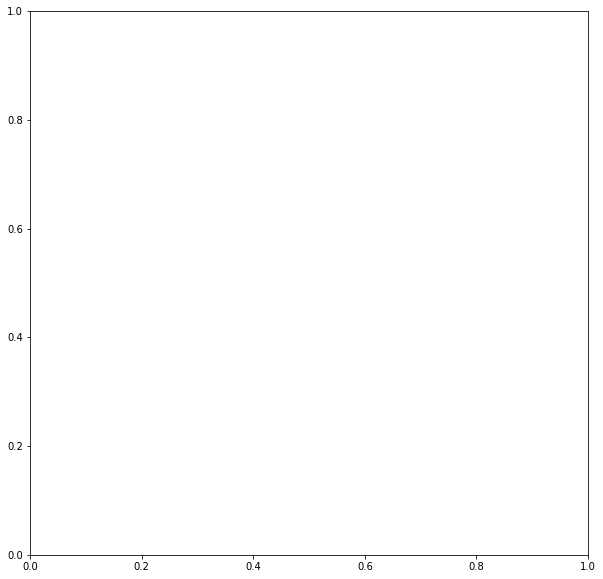

In [122]:
question2func(([1,1,1,1],[2,2,2,2]), 1, 1, 1)